<p align="center">
  <a href="https://colab.research.google.com/github/clarsendartois/Smart-Engineer-AI/blob/main/Machine%20Learning/Template/ML_Project_Template.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>
</p>

# <img src="6.png" width="100" style="display:inline; vertical-align:middle;"> **Analyzing Customer Reviews with NLP**

> _This project focuses on applying Natural Language Processing techniques to extract meaningful insights from customer reviews. By analyzing sentiment, identifying key entities, and uncovering recurring topics, the goal is to help businesses understand customer feedback at scale and make data-driven improvements to their services._

[![Smart Engineer AI](../../../Machine%20Learning/Template/assets/smart-engineer-ai.png)](https://www.youtube.com/watch?v=PJjuGdlRJnE)

<div class="markdown-google-sans">

## <img src="1.png" width="100" style="display:inline; vertical-align:middle;"> ***Phase 1: Text Preprocessing*** 🧹

> _This is the foundation of any NLP pipeline. Cleaning, normalizing, and structuring your text ensures consistency and prevents downstream models from being misled by noise._

</div>

**Load data**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('customer_reviews.csv')

In [3]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


**Lowercase**

In [7]:
data['review_lowercase'] = data['Review'].str.lower()

In [8]:
data.head()

,Review,Sentiment,review_lowercase
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...


**Stop word removal**

In [9]:
from nltk.corpus import stopwords

In [10]:
stp_words=stopwords.words('english')
def stop_word_removal(review): 
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview 

data['review_no_stopwords']=data['review_lowercase'].apply(stop_word_removal)

In [11]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...


**Punctuation**

In [12]:
import re

In [13]:
def remove_punctuation(review):
    cleanreview = re.sub(r'[^\w\s]', '', review)
    return cleanreview
data['review_no_punctuation'] = data['review_no_stopwords'].apply(remove_punctuation)

In [14]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...


**Tokenizing**

In [15]:
from nltk.tokenize import word_tokenize

In [16]:
def tokenize_review(review):
    return word_tokenize(review)
data['review_tokenized'] = data['review_no_punctuation'].apply(tokenize_review)

In [17]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation,review_tokenized
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...,"[fast, shipping, product, cheaply, made, broug..."
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy,"[case, takes, long, ship, even, worth, dont, buy]"
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...,"[good, droids, good, iphones, can, not, use, f..."
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...,"[cable, compatible, macbook, iphone, also, con..."
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...,"[case, nice, glow, light, disappointed, produc..."


In [18]:
data['review_tokenized'][0]

['fast',
 'shipping',
 'product',
 'cheaply',
 'made',
 'brought',
 'grandchild',
 'ipod',
 'would',
 'protected',
 'fell',
 'skin',
 'suitable',
 'protection',
 'good',
 'decoration',
 'therefore',
 'rated',
 'it1']

**Stemming**

In [19]:
from nltk.stem import PorterStemmer

In [20]:
ps = PorterStemmer()

In [21]:
def stem_review(review):
    return [ps.stem(word) for word in review]
data['review_stemmed'] = data['review_tokenized'].apply(stem_review)

In [22]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation,review_tokenized,review_stemmed
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...,"[fast, shipping, product, cheaply, made, broug...","[fast, ship, product, cheapli, made, brought, ..."
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy,"[case, takes, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]"
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...,"[good, droids, good, iphones, can, not, use, f...","[good, droid, good, iphon, can, not, use, feat..."
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...,"[cable, compatible, macbook, iphone, also, con...","[cabl, compat, macbook, iphon, also, connector..."
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...,"[case, nice, glow, light, disappointed, produc...","[case, nice, glow, light, disappoint, product,..."


In [23]:
data['review_stemmed'][0]

['fast',
 'ship',
 'product',
 'cheapli',
 'made',
 'brought',
 'grandchild',
 'ipod',
 'would',
 'protect',
 'fell',
 'skin',
 'suitabl',
 'protect',
 'good',
 'decor',
 'therefor',
 'rate',
 'it1']

**Lemmatization**

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
lem = WordNetLemmatizer()

In [26]:
def lemmatize_review(review):
    return [lem.lemmatize(word) for word in review]
data['review_lemmatized'] = data['review_tokenized'].apply(lemmatize_review)

In [27]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation,review_tokenized,review_stemmed,review_lemmatized
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...,"[fast, shipping, product, cheaply, made, broug...","[fast, ship, product, cheapli, made, brought, ...","[fast, shipping, product, cheaply, made, broug..."
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy,"[case, takes, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]"
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...,"[good, droids, good, iphones, can, not, use, f...","[good, droid, good, iphon, can, not, use, feat...","[good, droids, good, iphones, can, not, use, f..."
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...,"[cable, compatible, macbook, iphone, also, con...","[cabl, compat, macbook, iphon, also, connector...","[cable, compatible, macbook, iphone, also, con..."
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...,"[case, nice, glow, light, disappointed, produc...","[case, nice, glow, light, disappoint, product,...","[case, nice, glow, light, disappointed, produc..."


In [28]:
data['review_lemmatized'][0]

['fast',
 'shipping',
 'product',
 'cheaply',
 'made',
 'brought',
 'grandchild',
 'ipod',
 'would',
 'protected',
 'fell',
 'skin',
 'suitable',
 'protection',
 'good',
 'decoration',
 'therefore',
 'rated',
 'it1']

**N-grams**

In [29]:
import nltk

In [30]:
data_cleaned = sum(data['review_lemmatized'], [])

In [31]:
def ngram_frequency(data, n):
    ngrams = pd.Series(nltk.ngrams(data, n))
    return ngrams.value_counts().reset_index()[:10]

In [32]:
unigram_freq = ngram_frequency(data_cleaned, 1)
print("Top 10 Unigrams:")
print(unigram_freq)

Top 10 Unigrams:
        index  count
0     (work,)   8924
1      (one,)   8013
2     (case,)   7244
3       (br,)   6684
4    (would,)   6532
5     (good,)   6372
6  (product,)   6294
7       (it,)   6277
8      (get,)   5723
9    (great,)   5564


In [33]:
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Unigrams')

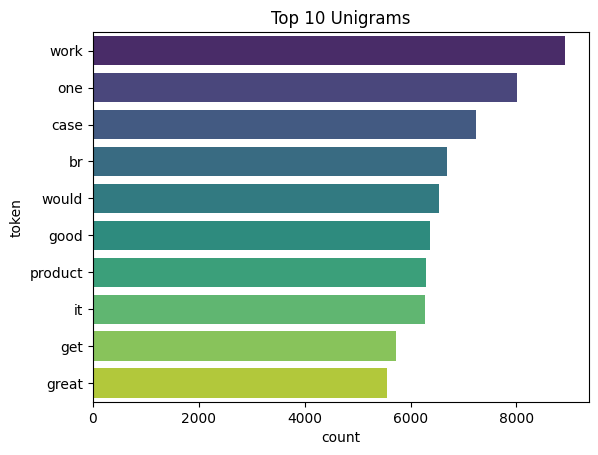

In [34]:
# Extract the token from the tuple so we can plot it
unigram_freq['token'] = unigram_freq['index'].apply(lambda x: x[0])
sns.barplot(x='count', y='token', data=unigram_freq, orient='horizontal', palette='viridis', hue='token', legend=False).set_title('Top 10 Unigrams')

<div class="markdown-google-sans">

## <img src="2.png" width="50" style="display:inline; vertical-align:middle;"> ***Phase 2: Parts of Speech Tagging & Named Entity Recognition*** 🧠

> _Understanding the grammatical roles of words (POS) and identifying real-world entities (NER) adds structure and semantics to raw text, enabling deeper analysis and context-aware applications._

</div>

**POS Tagging and NER**

In [35]:
import spacy

In [36]:
# ⚠️⚠️⚠️ python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [37]:
def process_text_in_chunks(nlp, text, chunk_size=900000):
    """Process large text in smaller chunks"""
    docs = []
    
    # Split text into chunks
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i + chunk_size]
        
        # Avoid breaking words - find the last space before chunk_size
        if i + chunk_size < len(text):
            last_space = chunk.rfind(' ')
            if last_space > chunk_size * 0.8:  # Only adjust if space is reasonably close
                chunk = chunk[:last_space]
        
        doc_chunk = nlp(chunk)
        docs.append(doc_chunk)
    
    return docs

In [38]:
# Process your data in chunks
text_to_process = ' '.join(data_cleaned)
doc_chunks = process_text_in_chunks(nlp, text_to_process)

In [39]:
def extract_entities_and_pos(doc_chunks):
    """Extract named entities and POS tags from chunked documents"""
    
    # Initialize lists to store data
    entities_data = []
    pos_data = []
    
    for i, doc in enumerate(doc_chunks):
        print(f"Extracting from chunk {i + 1}/{len(doc_chunks)}")
        
        # Extract named entities
        for ent in doc.ents:
            entities_data.append({
                'entity_text': ent.text,
                'entity_label': ent.label_,
                'entity_label_desc': spacy.explain(ent.label_),
                'start_char': ent.start_char,
                'end_char': ent.end_char,
                'chunk_id': i
            })
        
        # Extract POS tags for all tokens
        for token in doc:
            # Skip whitespace and punctuation if desired
            if not token.is_space and not token.is_punct:
                pos_data.append({
                    'token': token.text,
                    'lemma': token.lemma_,
                    'pos_tag': token.pos_,
                    'pos_tag_desc': spacy.explain(token.pos_),
                    'tag': token.tag_,
                    'tag_desc': spacy.explain(token.tag_),
                    'is_alpha': token.is_alpha,
                    'is_stop': token.is_stop,
                    'chunk_id': i
                })
    
    return entities_data, pos_data

In [40]:
# Extract entities and POS tags
print("Extracting named entities and POS tags...")
entities_data, pos_data = extract_entities_and_pos(doc_chunks)

Extracting named entities and POS tags...
Extracting from chunk 1/7
Extracting from chunk 2/7
Extracting from chunk 3/7
Extracting from chunk 4/7
Extracting from chunk 5/7
Extracting from chunk 6/7
Extracting from chunk 7/7


In [41]:
# Create DataFrames
entities_df = pd.DataFrame(entities_data)
pos_df = pd.DataFrame(pos_data)

In [42]:
# Display summary statistics
print(f"\nExtraction Summary:")
print(f"Total chunks processed: {len(doc_chunks)}")
print(f"Total named entities found: {len(entities_df)}")
print(f"Total tokens with POS tags: {len(pos_df)}")


Extraction Summary:
Total chunks processed: 7
Total named entities found: 40864
Total tokens with POS tags: 891519


In [43]:
# Display first few rows
print(f"\nFirst 5 Named Entities:")
print(entities_df.head())

print(f"\nFirst 5 POS Tags:")
print(pos_df.head())


First 5 Named Entities:
  entity_text entity_label                             entity_label_desc  \
0           5     CARDINAL  Numerals that do not fall under another type   
1          po          GPE                     Countries, cities, states   
2           3     CARDINAL  Numerals that do not fall under another type   
3           2     CARDINAL  Numerals that do not fall under another type   
4          30     CARDINAL  Numerals that do not fall under another type   

   start_char  end_char  chunk_id  
0         497       498         0  
1         558       560         0  
2         573       574         0  
3         640       641         0  
4         675       677         0  

First 5 POS Tags:
      token     lemma pos_tag pos_tag_desc  tag  \
0      fast      fast     ADJ    adjective   JJ   
1  shipping  shipping    NOUN         noun   NN   
2   product   product    NOUN         noun   NN   
3   cheaply   cheaply     ADV       adverb   RB   
4      made      make    VER

In [44]:
# Show entity type distribution
if len(entities_df) > 0:
    print(f"\nEntity Types Distribution:")
    print(entities_df['entity_label'].value_counts().head(10))


Entity Types Distribution:
entity_label
CARDINAL    20118
DATE         7047
ORDINAL      3779
ORG          2261
PERSON       2091
TIME         1750
QUANTITY     1383
GPE           788
NORP          648
PRODUCT       437
Name: count, dtype: int64


In [45]:
# Show POS tag distribution
if len(pos_df) > 0:
    print(f"\nPOS Tags Distribution:")
    print(pos_df['pos_tag'].value_counts().head(10))


POS Tags Distribution:
pos_tag
NOUN     341299
VERB     180333
ADJ      131047
ADV       74120
PROPN     47061
NUM       31022
AUX       21123
PRON      21086
ADP       18165
DET        6995
Name: count, dtype: int64


Creating Named Entity Types Distribution Plot...


C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=entity_counts.values, y=entity_counts.index,
C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, fontsize=10)


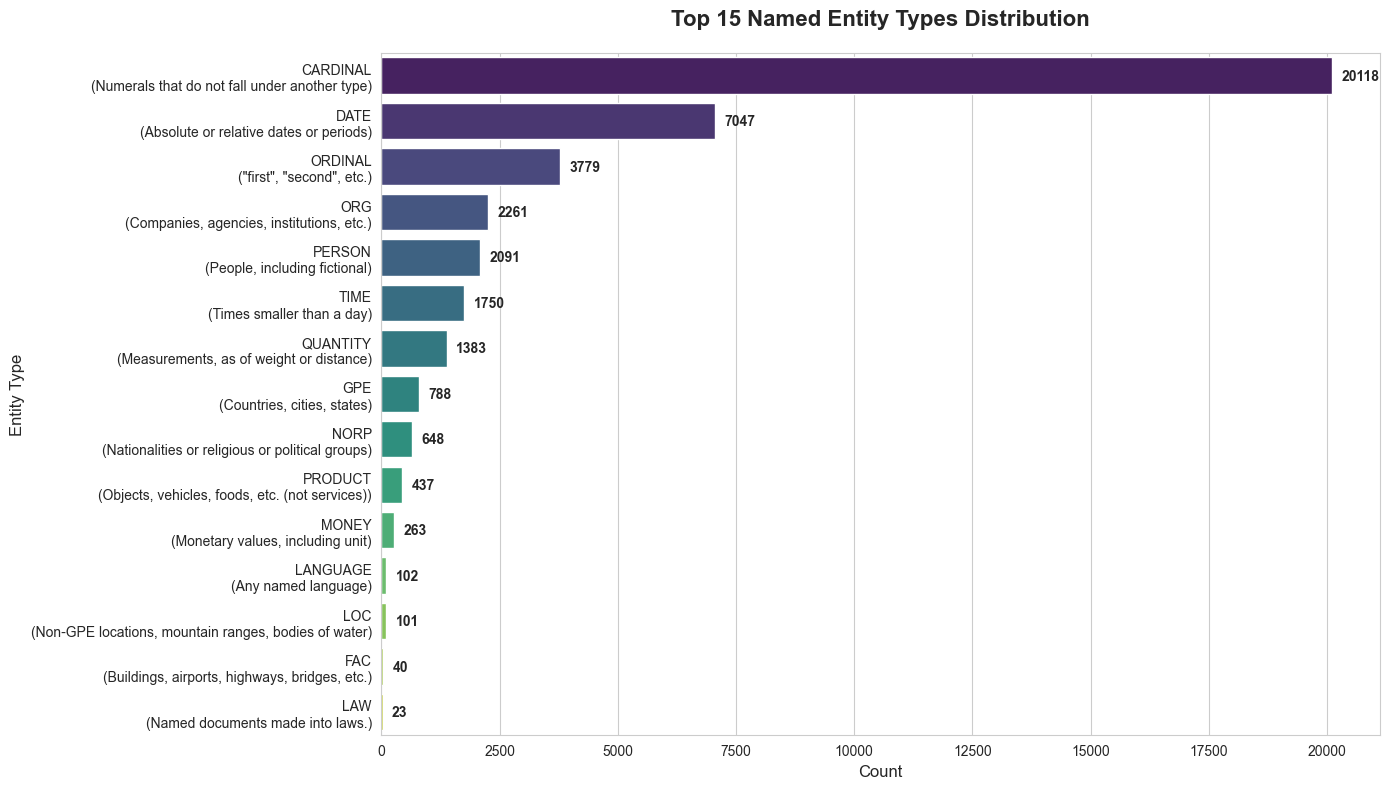

Total unique entity types: 18
Total entities found: 40864

Creating POS Tags Distribution Plot...


C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=pos_counts.values, y=pos_counts.index,
C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, fontsize=10)


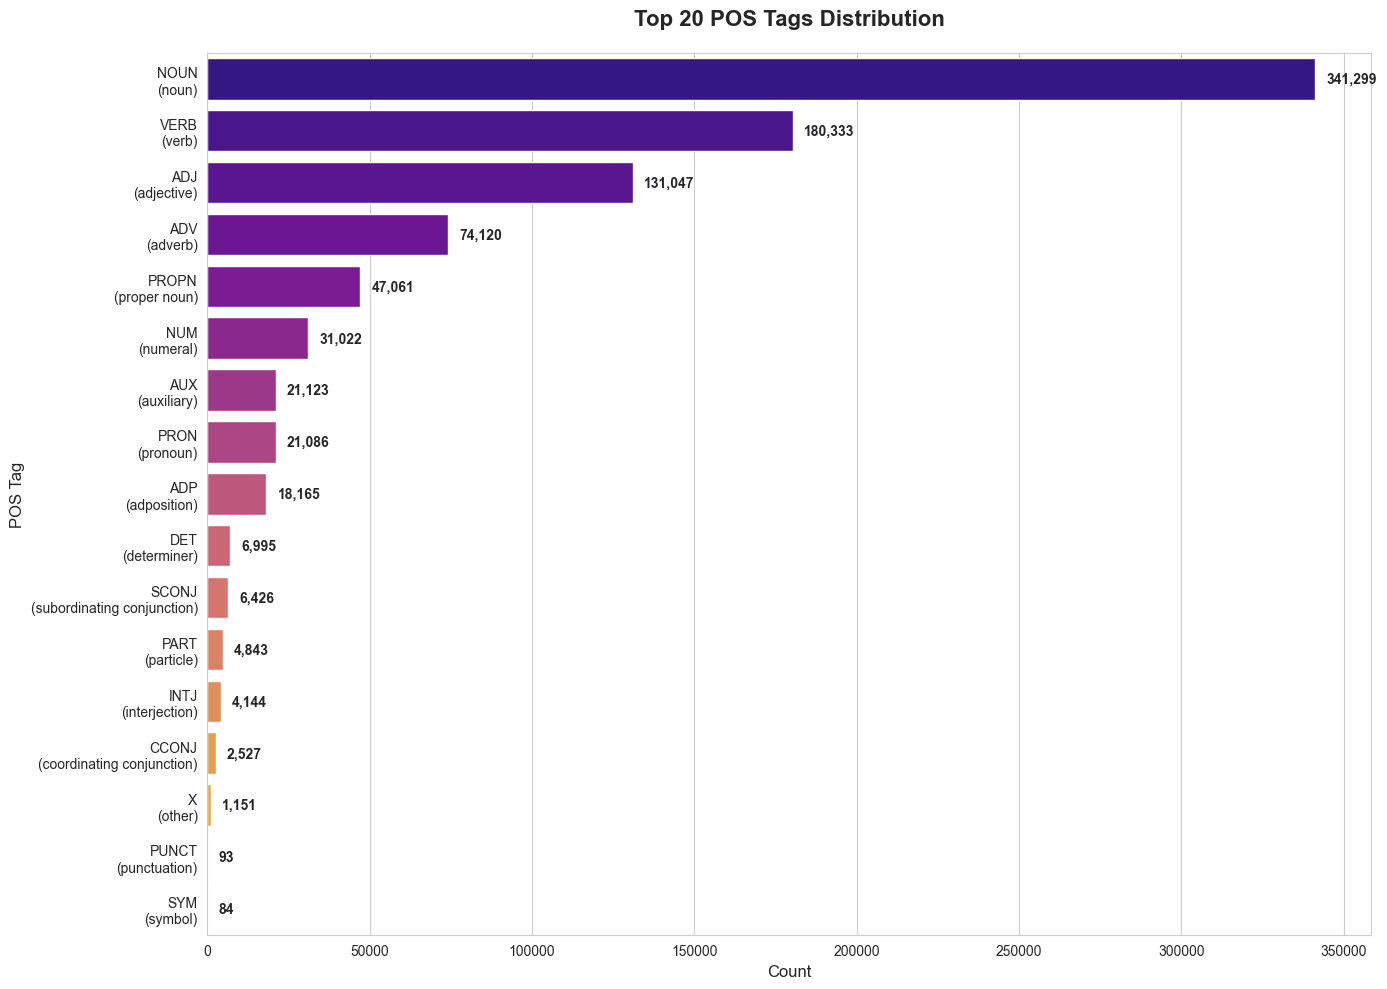

Total unique POS tags: 17
Total tokens analyzed: 891,519

Creating Combined Comparison Plot...


C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.values, y=entity_counts.index,
C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.values, y=pos_counts.index,


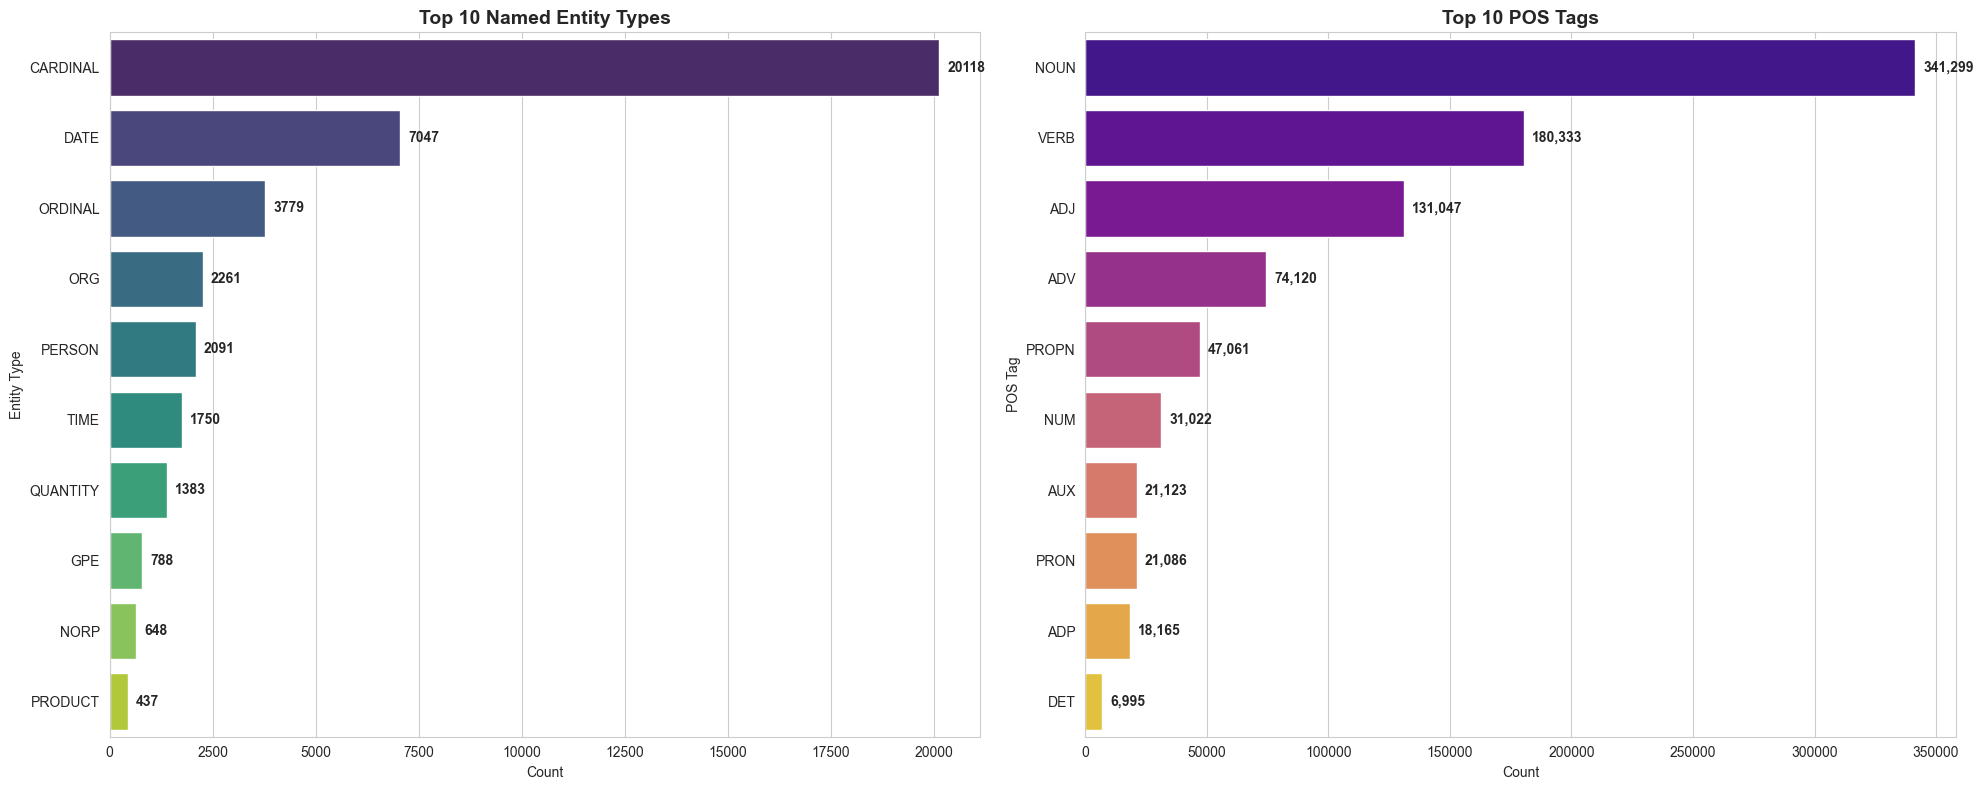


Creating Detailed POS Tag Analysis...


C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Set2', ax=ax1)
C:\Users\darto\AppData\Local\Temp\ipykernel_7052\2207687208.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette='Set3', ax=ax2)


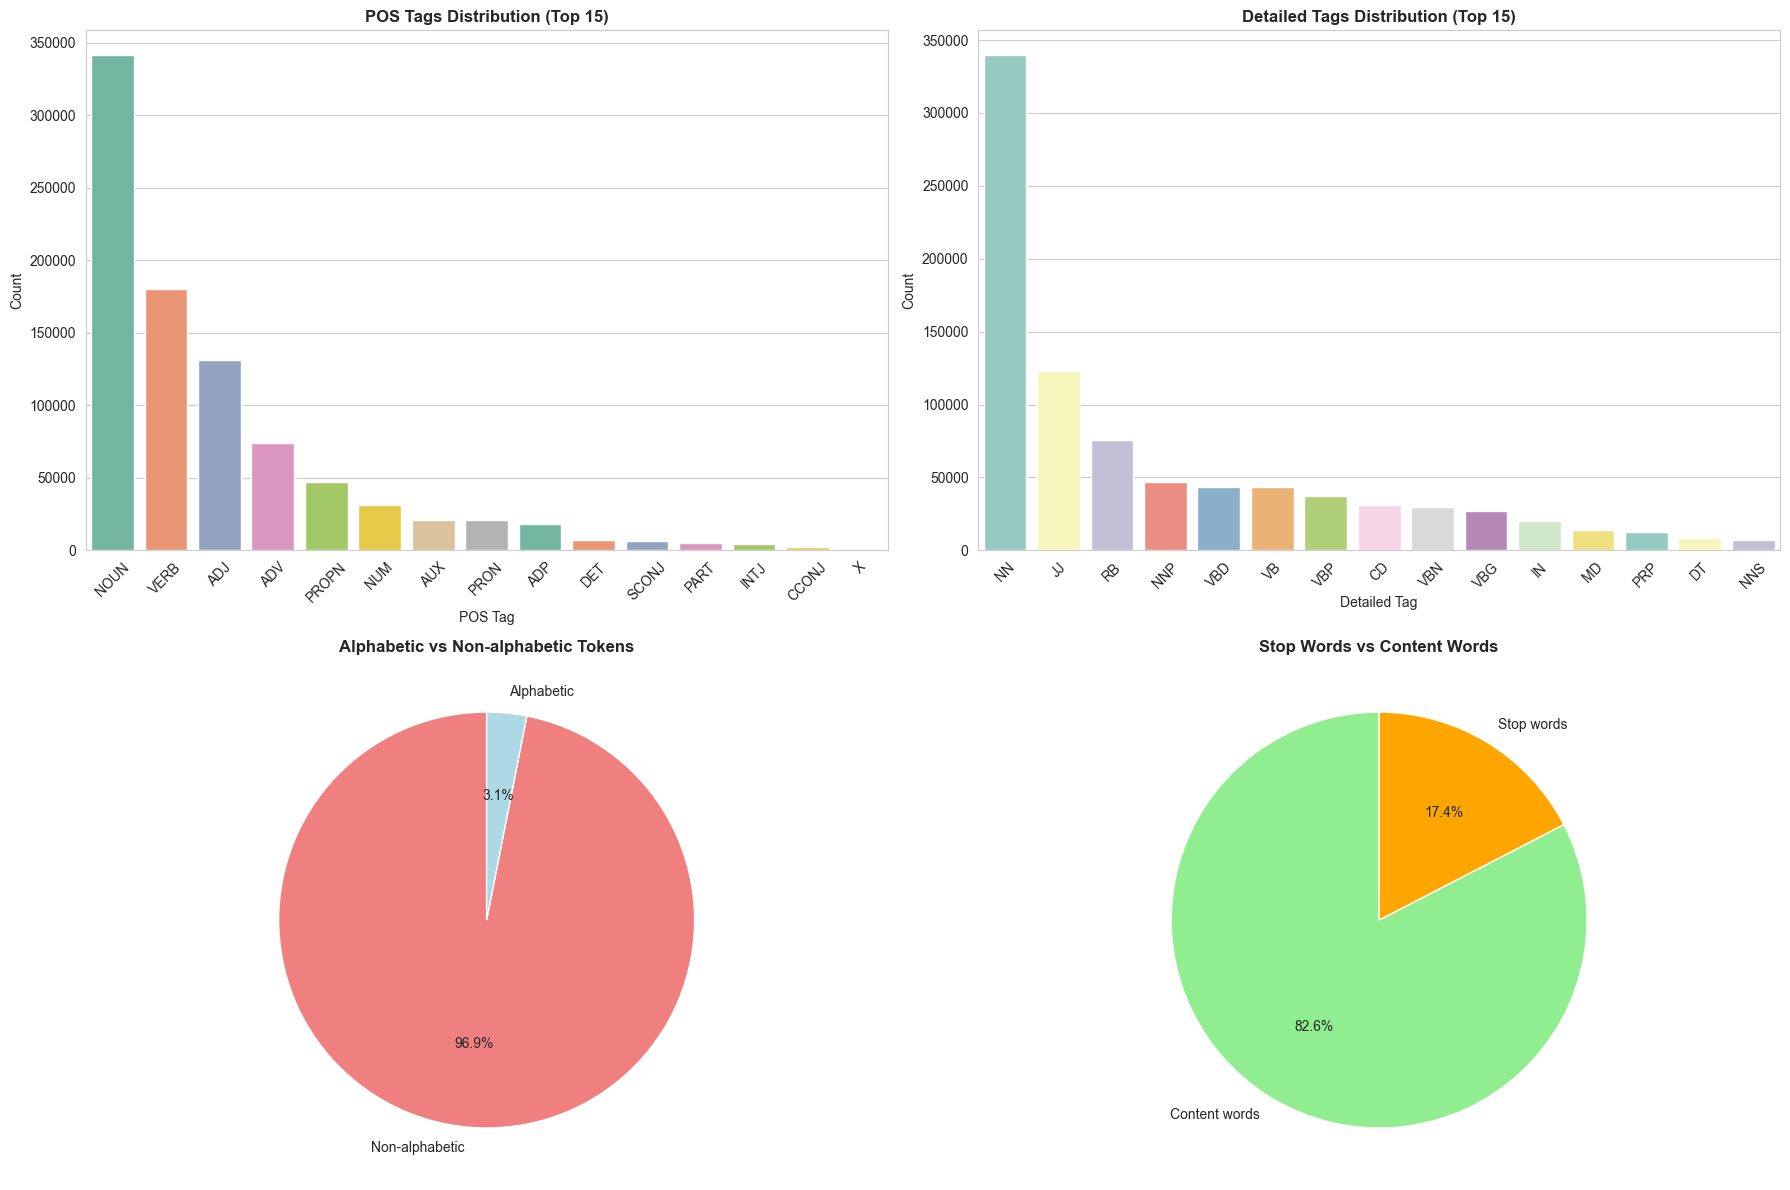


SUMMARY STATISTICS
Named Entities Summary:
  • Total entities: 40,864
  • Unique entity types: 18
  • Most common entity type: CARDINAL

POS Tags Summary:
  • Total tokens: 891,519
  • Unique POS tags: 17
  • Most common POS tag: NOUN
  • Alphabetic tokens: 863,941 (96.9%)
  • Stop words: 155,183 (17.4%)


In [46]:
import matplotlib.pyplot as plt

# Set the style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

def plot_entity_distribution(entities_df, top_n=15):
    """Plot distribution of named entity types"""
    if len(entities_df) == 0:
        print("No entities found to plot")
        return
    
    # Get entity counts
    entity_counts = entities_df['entity_label'].value_counts().head(top_n)
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    
    # Create barplot
    ax = sns.barplot(x=entity_counts.values, y=entity_counts.index, 
                     palette='viridis', orient='h')
    
    # Customize the plot
    plt.title(f'Top {top_n} Named Entity Types Distribution', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Entity Type', fontsize=12)
    
    # Add value labels on bars
    for i, v in enumerate(entity_counts.values):
        ax.text(v + max(entity_counts.values) * 0.01, i, str(v), 
                va='center', fontweight='bold')
    
    # Add entity descriptions as secondary labels
    y_labels = []
    for label in entity_counts.index:
        desc = entities_df[entities_df['entity_label'] == label]['entity_label_desc'].iloc[0]
        y_labels.append(f"{label}\n({desc})")
    
    ax.set_yticklabels(y_labels, fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"Total unique entity types: {entities_df['entity_label'].nunique()}")
    print(f"Total entities found: {len(entities_df)}")

def plot_pos_distribution(pos_df, top_n=20):
    """Plot distribution of POS tags"""
    if len(pos_df) == 0:
        print("No POS tags found to plot")
        return
    
    # Get POS tag counts
    pos_counts = pos_df['pos_tag'].value_counts().head(top_n)
    
    # Create the plot
    plt.figure(figsize=(14, 10))
    
    # Create barplot
    ax = sns.barplot(x=pos_counts.values, y=pos_counts.index, 
                     palette='plasma', orient='h')
    
    # Customize the plot
    plt.title(f'Top {top_n} POS Tags Distribution', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('POS Tag', fontsize=12)
    
    # Add value labels on bars
    for i, v in enumerate(pos_counts.values):
        ax.text(v + max(pos_counts.values) * 0.01, i, f'{v:,}', 
                va='center', fontweight='bold')
    
    # Add POS descriptions as secondary labels
    y_labels = []
    for tag in pos_counts.index:
        desc = pos_df[pos_df['pos_tag'] == tag]['pos_tag_desc'].iloc[0]
        if desc:
            y_labels.append(f"{tag}\n({desc})")
        else:
            y_labels.append(tag)
    
    ax.set_yticklabels(y_labels, fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"Total unique POS tags: {pos_df['pos_tag'].nunique()}")
    print(f"Total tokens analyzed: {len(pos_df):,}")

def plot_combined_comparison(entities_df, pos_df):
    """Create a combined view with subplots"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Entity distribution subplot
    if len(entities_df) > 0:
        entity_counts = entities_df['entity_label'].value_counts().head(10)
        sns.barplot(x=entity_counts.values, y=entity_counts.index, 
                   palette='viridis', ax=ax1, orient='h')
        ax1.set_title('Top 10 Named Entity Types', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Count')
        ax1.set_ylabel('Entity Type')
        
        # Add value labels
        for i, v in enumerate(entity_counts.values):
            ax1.text(v + max(entity_counts.values) * 0.01, i, str(v), 
                    va='center', fontweight='bold')
    
    # POS distribution subplot
    if len(pos_df) > 0:
        pos_counts = pos_df['pos_tag'].value_counts().head(10)
        sns.barplot(x=pos_counts.values, y=pos_counts.index, 
                   palette='plasma', ax=ax2, orient='h')
        ax2.set_title('Top 10 POS Tags', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Count')
        ax2.set_ylabel('POS Tag')
        
        # Add value labels
        for i, v in enumerate(pos_counts.values):
            ax2.text(v + max(pos_counts.values) * 0.01, i, f'{v:,}', 
                    va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_detailed_tag_analysis(pos_df):
    """Create detailed POS tag analysis plots"""
    if len(pos_df) == 0:
        print("No POS data available")
        return
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. POS tag distribution (top 15)
    pos_counts = pos_df['pos_tag'].value_counts().head(15)
    sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Set2', ax=ax1)
    ax1.set_title('POS Tags Distribution (Top 15)', fontweight='bold')
    ax1.set_xlabel('POS Tag')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Detailed TAG distribution (top 15)
    tag_counts = pos_df['tag'].value_counts().head(15)
    sns.barplot(x=tag_counts.index, y=tag_counts.values, palette='Set3', ax=ax2)
    ax2.set_title('Detailed Tags Distribution (Top 15)', fontweight='bold')
    ax2.set_xlabel('Detailed Tag')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Alphabetic vs Non-alphabetic tokens
    alpha_counts = pos_df['is_alpha'].value_counts()
    colors = ['lightcoral', 'lightblue']
    ax3.pie(alpha_counts.values, labels=['Non-alphabetic', 'Alphabetic'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
    ax3.set_title('Alphabetic vs Non-alphabetic Tokens', fontweight='bold')
    
    # 4. Stop words vs Content words
    stop_counts = pos_df['is_stop'].value_counts()
    colors = ['lightgreen', 'orange']
    ax4.pie(stop_counts.values, labels=['Content words', 'Stop words'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
    ax4.set_title('Stop Words vs Content Words', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Generate the plots
print("Creating Named Entity Types Distribution Plot...")
plot_entity_distribution(entities_df, top_n=15)

print("\nCreating POS Tags Distribution Plot...")
plot_pos_distribution(pos_df, top_n=20)

print("\nCreating Combined Comparison Plot...")
plot_combined_comparison(entities_df, pos_df)

print("\nCreating Detailed POS Tag Analysis...")
plot_detailed_tag_analysis(pos_df)

# Optional: Create a summary statistics table
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

if len(entities_df) > 0:
    print(f"Named Entities Summary:")
    print(f"  • Total entities: {len(entities_df):,}")
    print(f"  • Unique entity types: {entities_df['entity_label'].nunique()}")
    print(f"  • Most common entity type: {entities_df['entity_label'].mode().iloc[0]}")
    print()

if len(pos_df) > 0:
    print(f"POS Tags Summary:")
    print(f"  • Total tokens: {len(pos_df):,}")
    print(f"  • Unique POS tags: {pos_df['pos_tag'].nunique()}")
    print(f"  • Most common POS tag: {pos_df['pos_tag'].mode().iloc[0]}")
    print(f"  • Alphabetic tokens: {pos_df['is_alpha'].sum():,} ({pos_df['is_alpha'].mean()*100:.1f}%)")
    print(f"  • Stop words: {pos_df['is_stop'].sum():,} ({pos_df['is_stop'].mean()*100:.1f}%)")

<div class="markdown-google-sans">

## <img src="3.png" width="50" style="display:inline; vertical-align:middle;"> ***Phase 3: Sentiment Analysis*** 😊☹️

> _This phase determines the emotional tone behind a body of text—crucial for understanding opinions, feedback, and customer satisfaction in reviews, social media, and more._

</div>

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
# use vader so we also get a neutral sentiment count
vader_sentiment = SentimentIntensityAnalyzer()

In [49]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation,review_tokenized,review_stemmed,review_lemmatized
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...,"[fast, shipping, product, cheaply, made, broug...","[fast, ship, product, cheapli, made, brought, ...","[fast, shipping, product, cheaply, made, broug..."
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy,"[case, takes, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]"
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...,"[good, droids, good, iphones, can, not, use, f...","[good, droid, good, iphon, can, not, use, feat...","[good, droids, good, iphones, can, not, use, f..."
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...,"[cable, compatible, macbook, iphone, also, con...","[cabl, compat, macbook, iphon, also, connector...","[cable, compatible, macbook, iphone, also, con..."
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...,"[case, nice, glow, light, disappointed, produc...","[case, nice, glow, light, disappoint, product,...","[case, nice, glow, light, disappointed, produc..."


In [50]:
data['vader_sentiment_score'] = data['Review'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])


In [51]:
# create labels
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

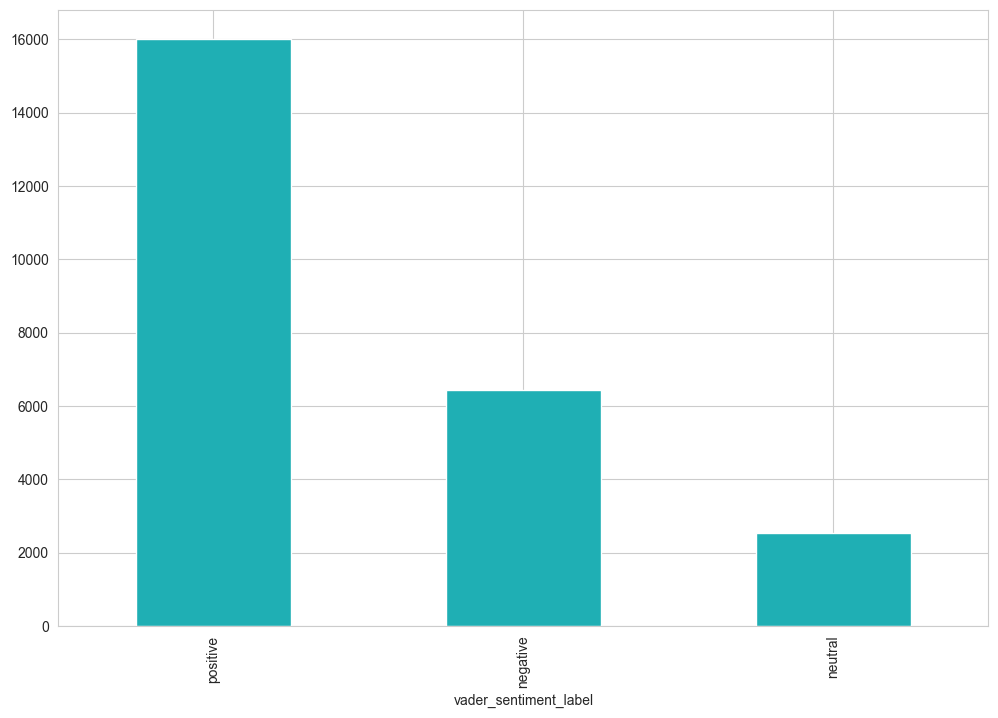

In [52]:
default_plot_colour = "#1fafb4"  # Default color for plots
data['vader_sentiment_label'].value_counts().plot.bar(color=default_plot_colour)


In [53]:
data['Sentiment'].value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    4999
Name: count, dtype: int64

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change them the values to those categories. For that the condition will be like if the sentiment value is less than or equal to 3, then it is negative(0) else positive(1). For better understanding, refer the code below.

In [54]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment_label'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment_label'] = 1

In [55]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation,review_tokenized,review_stemmed,review_lemmatized,vader_sentiment_score,vader_sentiment_label,Sentiment_label
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...,"[fast, shipping, product, cheaply, made, broug...","[fast, ship, product, cheapli, made, brought, ...","[fast, shipping, product, cheaply, made, broug...",0.8271,positive,0.0
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy,"[case, takes, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]",-0.4280,negative,0.0
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...,"[good, droids, good, iphones, can, not, use, f...","[good, droid, good, iphon, can, not, use, feat...","[good, droids, good, iphones, can, not, use, f...",0.6047,positive,0.0
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...,"[cable, compatible, macbook, iphone, also, con...","[cabl, compat, macbook, iphon, also, connector...","[cable, compatible, macbook, iphone, also, con...",0.0000,neutral,0.0
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...,"[case, nice, glow, light, disappointed, produc...","[case, nice, glow, light, disappoint, product,...","[case, nice, glow, light, disappointed, produc...",-0.5023,negative,0.0


In [56]:
data['Sentiment_label'].value_counts()

Sentiment_label
0.0    15000
1.0     9999
Name: count, dtype: int64

In [57]:
from wordcloud import WordCloud

To have the better picture of the importance of the words let's create the Wordcloud of all the words with sentiment = 0 i.e. negative

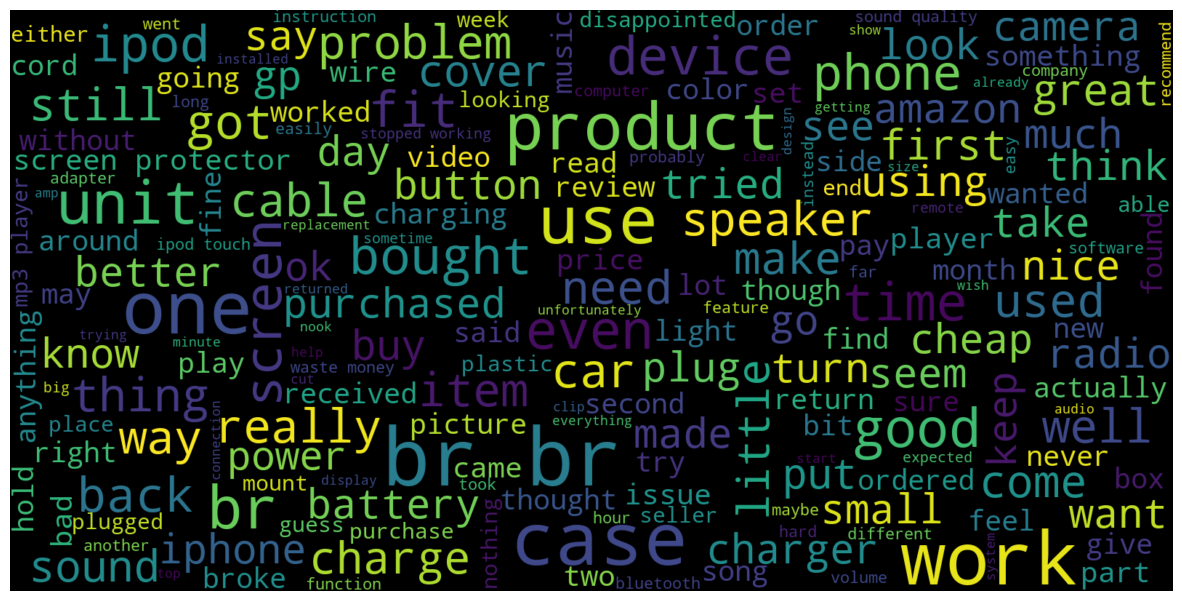

In [58]:
consolidated=' '.join(word for word in data['review_no_stopwords'][data['Sentiment_label']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Let's do the same for all the words with sentiment = 1 i.e. positive

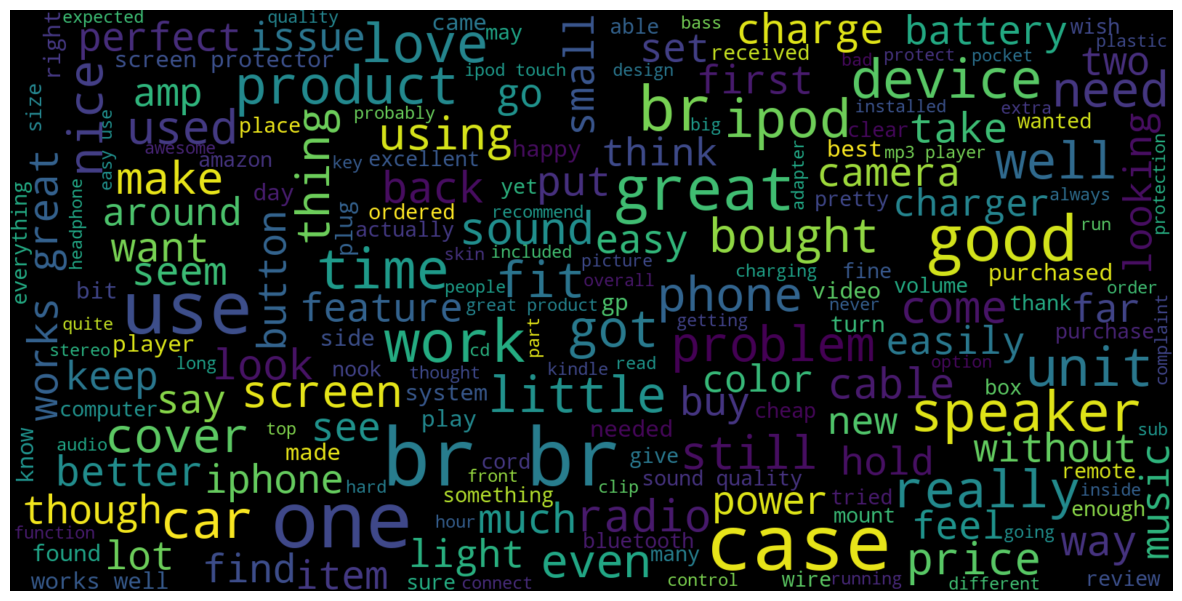

In [59]:
consolidated=' '.join(word for word in data['review_no_stopwords'][data['Sentiment_label']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

<div class="markdown-google-sans">

## <img src="4.png" width="50" style="display:inline; vertical-align:middle;"> ***Phase 4: Text Vectorization / Embeddings*** 🔢

> _Text must be converted into a numerical form to be processed by machine learning models. Embeddings capture syntactic and semantic meaning, forming the bridge between language and math._

</div>

In [60]:
# ⚠️⚠️⚠️ pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review_no_stopwords'] ).toarray()

**Model training, Evaluation, and Prediction**

Once analysis and vectorization is done. We can now explore any machine learning model to train the data. But before that perform the train-test split.

In [62]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment_label'],
                                                test_size=0.25 ,
                                                random_state=42)

Now we can train any model, Let's explore the Logistic Regression.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

# This code is modified by Susobhan Akhuli

0.81136


Let's see the confusion matrix for the results.

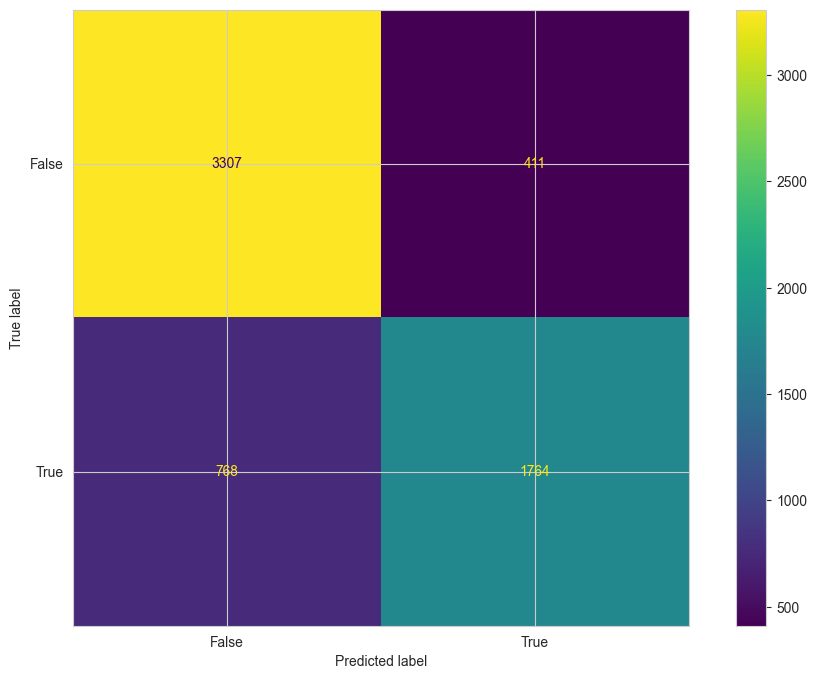

In [64]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

<div class="markdown-google-sans">

## <img src="5.png" width="50" style="display:inline; vertical-align:middle;"> ***Phase 5: Topic Modeling*** 🧭

> _Discovering hidden themes within large collections of text reveals what people are talking about. This step helps in summarizing, organizing, and exploring textual data at scale._

</div>

In [65]:
data.head()

,Review,Sentiment,review_lowercase,review_no_stopwords,review_no_punctuation,review_tokenized,review_stemmed,review_lemmatized,vader_sentiment_score,vader_sentiment_label,Sentiment_label
0,Fast shipping but this product is very cheaply...,1,fast shipping but this product is very cheaply...,fast shipping product cheaply made brought gra...,fast shipping product cheaply made brought gra...,"[fast, shipping, product, cheaply, made, broug...","[fast, ship, product, cheapli, made, brought, ...","[fast, shipping, product, cheaply, made, broug...",0.8271,positive,0.0
1,This case takes so long to ship and it's not e...,1,this case takes so long to ship and it's not e...,case takes long ship even worth dont buy!!!!,case takes long ship even worth dont buy,"[case, takes, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]","[case, take, long, ship, even, worth, dont, buy]",-0.4280,negative,0.0
2,Good for not droids. Not good for iPhones. You...,1,good for not droids. not good for iphones. you...,good droids. good iphones. cannot use features...,good droids good iphones cannot use features w...,"[good, droids, good, iphones, can, not, use, f...","[good, droid, good, iphon, can, not, use, feat...","[good, droids, good, iphones, can, not, use, f...",0.6047,positive,0.0
3,The cable was not compatible between my macboo...,1,the cable was not compatible between my macboo...,cable compatible macbook iphone. also connecto...,cable compatible macbook iphone also connector...,"[cable, compatible, macbook, iphone, also, con...","[cabl, compat, macbook, iphon, also, connector...","[cable, compatible, macbook, iphone, also, con...",0.0000,neutral,0.0
4,The case is nice but did not have a glow light...,1,the case is nice but did not have a glow light...,case nice glow light. disappointed product mee...,case nice glow light disappointed product meet...,"[case, nice, glow, light, disappointed, produc...","[case, nice, glow, light, disappoint, product,...","[case, nice, glow, light, disappointed, produc...",-0.5023,negative,0.0


In [71]:
data_cleaned

['fast',
 'shipping',
 'product',
 'cheaply',
 'made',
 'brought',
 'grandchild',
 'ipod',
 'would',
 'protected',
 'fell',
 'skin',
 'suitable',
 'protection',
 'good',
 'decoration',
 'therefore',
 'rated',
 'it1',
 'case',
 'take',
 'long',
 'ship',
 'even',
 'worth',
 'dont',
 'buy',
 'good',
 'droids',
 'good',
 'iphones',
 'can',
 'not',
 'use',
 'feature',
 'watch',
 'iphone',
 'synch',
 'iphone',
 'cable',
 'compatible',
 'macbook',
 'iphone',
 'also',
 'connector',
 'came',
 'apart',
 'cable',
 'started',
 'fraying',
 'case',
 'nice',
 'glow',
 'light',
 'disappointed',
 'product',
 'meet',
 'advertisement',
 'cable',
 'keep',
 'coming',
 'message',
 'accessory',
 'supported',
 'bought',
 'specifically',
 'led',
 'believe',
 'totally',
 'compatible',
 'iphone',
 '5',
 'able',
 'charge',
 'iphone',
 'either',
 'cable',
 'ii',
 'throw',
 'trash',
 'waste',
 'money',
 'po',
 'broke',
 'phone',
 '3',
 'us',
 'luckily',
 'able',
 'pull',
 'remnant',
 'tweezer',
 'stay',
 'away',
 '

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import numpy as np

**1. TF-IDF VECTORIZATION**

In [77]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,           # Top 1000 features
    stop_words='english',        # Remove English stop words
    max_df=0.8,                 # Ignore terms in more than 80% of documents
    min_df=2,                   # Ignore terms in less than 2 documents
    ngram_range=(1, 2),         # Include unigrams and bigrams
    lowercase=True
)

In [78]:
# Fit and transform the texts
tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [79]:
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Number of documents: {tfidf_matrix.shape[0]}")
print(f"Number of features: {tfidf_matrix.shape[1]}")

TF-IDF Matrix Shape: (885576, 1000)
Number of documents: 885576
Number of features: 1000


In [80]:
# Show top TF-IDF terms across corpus
tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
top_tfidf_indices = tfidf_scores.argsort()[-20:][::-1]
print("\nTop 20 TF-IDF terms across corpus:")
for i, idx in enumerate(top_tfidf_indices):
    print(f"{i+1:2d}. {tfidf_feature_names[idx]:20s} (score: {tfidf_scores[idx]:.3f})")



Top 20 TF-IDF terms across corpus:
 1. work                 (score: 8924.000)
 2. case                 (score: 7244.000)
 3. br                   (score: 6684.000)
 4. good                 (score: 6372.000)
 5. product              (score: 6294.000)
 6. great                (score: 5564.000)
 7. use                  (score: 5552.000)
 8. like                 (score: 5524.000)
 9. ipod                 (score: 4830.000)
10. time                 (score: 4624.000)
11. sound                (score: 4068.000)
12. screen               (score: 4008.000)
13. fit                  (score: 3910.000)
14. unit                 (score: 3547.000)
15. quality              (score: 3345.000)
16. bought               (score: 3246.000)
17. really               (score: 3161.000)
18. battery              (score: 3029.000)
19. phone                (score: 3021.000)
20. price                (score: 2971.000)


**2. LSA (LATENT SEMANTIC ANALYSIS)**

In [81]:
# LSA with TF-IDF
n_components = 5  # Number of topics
lsa_model = TruncatedSVD(n_components=n_components, random_state=42)

In [82]:
# Create pipeline: TF-IDF -> LSA -> Normalizer
lsa_pipeline = make_pipeline(
    tfidf_vectorizer,
    lsa_model,
    Normalizer(copy=False)
)

In [83]:
# Fit the pipeline
lsa_matrix = lsa_pipeline.fit_transform(data_cleaned)

In [84]:
print(f"LSA Matrix Shape: {lsa_matrix.shape}")
print(f"Explained Variance Ratio: {lsa_model.explained_variance_ratio_}")
print(f"Total Explained Variance: {lsa_model.explained_variance_ratio_.sum():.3f}")

LSA Matrix Shape: (885576, 5)
Explained Variance Ratio: [0.01655635 0.01346538 0.01243058 0.01185214 0.01171081]
Total Explained Variance: 0.066


In [85]:
# Extract topics from LSA
def display_topics(model, feature_names, n_top_words=10):
    """Display top words for each topic"""
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_weights = [topic[i] for i in top_words_idx]
        
        print(f"\nTopic {topic_idx}:")
        for word, weight in zip(top_words, top_weights):
            print(f"  {word:15s} ({weight:6.3f})")

print("\nLSA Topics:")
display_topics(lsa_model, tfidf_feature_names, n_top_words=10)


LSA Topics:

Topic 0:
  work            ( 1.000)
  screen          ( 0.003)
  little          ( 0.002)
  sound           ( 0.001)
  got             ( 0.001)
  thing           ( 0.001)
  price           ( 0.001)
  charge          ( 0.000)
  better          ( 0.000)
  charger         ( 0.000)

Topic 1:
  case            ( 1.000)
  unit            ( 0.007)
  bought          ( 0.005)
  use             ( 0.003)
  speaker         ( 0.002)
  phone           ( 0.001)
  car             ( 0.001)
  item            ( 0.001)
  radio           ( 0.001)
  cover           ( 0.001)

Topic 2:
  br              ( 1.000)
  unit            ( 0.005)
  got             ( 0.004)
  car             ( 0.003)
  speaker         ( 0.003)
  use             ( 0.003)
  look            ( 0.003)
  item            ( 0.003)
  battery         ( 0.002)
  buy             ( 0.002)

Topic 3:
  good            ( 1.000)
  screen          ( 0.011)
  sound           ( 0.010)
  thing           ( 0.006)
  look            ( 0.004)
  

**3. COMPARISON: COUNT vs TF-IDF with LDA**

In [86]:
# LDA with Count Vectorizer (your original approach)
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
count_matrix = count_vectorizer.fit_transform(data_cleaned)
lda_count = LatentDirichletAllocation(n_components=5, random_state=42)
lda_count.fit(count_matrix)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [90]:
print("LDA with Count Vectorizer:")
count_feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_count.components_):
    top_words = [count_feature_names[i] for i in topic.argsort()[-10:][::-1]]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

LDA with Count Vectorizer:
Topic 0: work, br, unit, really, phone, speaker, radio, better, item, player
Topic 1: good, product, ipod, car, charge, need, easy, day, power, usb
Topic 2: case, time, bought, battery, device, cable, button, using, love, money
Topic 3: use, sound, price, buy, problem, nice, cover, used, want, come
Topic 4: great, like, screen, fit, quality, little, got, thing, make, look


In [91]:
# LDA with TF-IDF
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=42)
lda_tfidf.fit(tfidf_matrix)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [92]:
print("\nLDA with TF-IDF:")
for topic_idx, topic in enumerate(lda_tfidf.components_):
    top_words = [tfidf_feature_names[i] for i in topic.argsort()[-10:][::-1]]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")


LDA with TF-IDF:
Topic 0: work, br, unit, really, phone, speaker, radio, better, item, player
Topic 1: good, product, ipod, car, charge, need, easy, day, power, usb
Topic 2: case, time, bought, battery, device, cable, button, using, love, money
Topic 3: use, sound, price, buy, problem, nice, cover, used, want, new
Topic 4: great, like, screen, fit, quality, little, got, thing, make, look


**4. EVALUATION METRICS**

In [93]:
# Perplexity (lower is better for LDA)
perplexity_count = lda_count.perplexity(count_matrix)
perplexity_tfidf = lda_tfidf.perplexity(tfidf_matrix)

In [94]:
print(f"LDA with Count Vectorizer - Perplexity: {perplexity_count:.2f}")
print(f"LDA with TF-IDF - Perplexity: {perplexity_tfidf:.2f}")

LDA with Count Vectorizer - Perplexity: 577.57
LDA with TF-IDF - Perplexity: 577.64


In [95]:
# Log-likelihood (higher is better for LDA)
log_likelihood_count = lda_count.score(count_matrix)
log_likelihood_tfidf = lda_tfidf.score(tfidf_matrix)

In [96]:
print(f"LDA with Count Vectorizer - Log Likelihood: {log_likelihood_count:.2f}")
print(f"LDA with TF-IDF - Log Likelihood: {log_likelihood_tfidf:.2f}")

LDA with Count Vectorizer - Log Likelihood: -3399508.48
LDA with TF-IDF - Log Likelihood: -3399578.48


In [97]:
# LSA explained variance
print(f"LSA - Total Explained Variance: {lsa_model.explained_variance_ratio_.sum():.3f}")

LSA - Total Explained Variance: 0.066


**5. VISUALIZATION FUNCTIONS**

In [99]:
def plot_explained_variance(lsa_model):
    """Plot explained variance for LSA components"""
    plt.figure(figsize=(10, 6))
    
    # Individual explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(lsa_model.explained_variance_ratio_) + 1), 
            lsa_model.explained_variance_ratio_)
    plt.xlabel('Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by LSA Component')
    
    # Cumulative explained variance
    plt.subplot(1, 2, 2)
    cumulative_var = np.cumsum(lsa_model.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_topic_comparison():
    """Compare different topic modeling approaches"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # LDA with Count Vectorizer
    ax1 = axes[0, 0]
    topics_count = []
    for topic_idx, topic in enumerate(lda_count.components_):
        top_words = [count_feature_names[i] for i in topic.argsort()[-5:][::-1]]
        topics_count.extend([(f'Topic {topic_idx}', word, topic[count_feature_names.tolist().index(word)]) 
                           for word in top_words])
    
    df_count = pd.DataFrame(topics_count, columns=['Topic', 'Word', 'Weight'])
    sns.barplot(data=df_count, x='Weight', y='Word', hue='Topic', ax=ax1)
    ax1.set_title('LDA with Count Vectorizer')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # LDA with TF-IDF
    ax2 = axes[0, 1]
    topics_tfidf = []
    for topic_idx, topic in enumerate(lda_tfidf.components_):
        top_words = [tfidf_feature_names[i] for i in topic.argsort()[-5:][::-1]]
        topics_tfidf.extend([(f'Topic {topic_idx}', word, topic[tfidf_feature_names.tolist().index(word)]) 
                           for word in top_words])
    
    df_tfidf = pd.DataFrame(topics_tfidf, columns=['Topic', 'Word', 'Weight'])
    sns.barplot(data=df_tfidf, x='Weight', y='Word', hue='Topic', ax=ax2)
    ax2.set_title('LDA with TF-IDF')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # LSA Topics
    ax3 = axes[1, 0]
    topics_lsa = []
    for topic_idx, topic in enumerate(lsa_model.components_):
        top_words = [tfidf_feature_names[i] for i in topic.argsort()[-5:][::-1]]
        topics_lsa.extend([(f'Topic {topic_idx}', word, topic[tfidf_feature_names.tolist().index(word)]) 
                         for word in top_words])
    
    df_lsa = pd.DataFrame(topics_lsa, columns=['Topic', 'Word', 'Weight'])
    sns.barplot(data=df_lsa, x='Weight', y='Word', hue='Topic', ax=ax3)
    ax3.set_title('LSA Topics')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Model Performance Comparison
    ax4 = axes[1, 1]
    performance_data = {
        'Model': ['LDA (Count)', 'LDA (TF-IDF)', 'LSA'],
        'Perplexity': [perplexity_count, perplexity_tfidf, np.nan],
        'Log_Likelihood': [log_likelihood_count, log_likelihood_tfidf, np.nan],
        'Explained_Variance': [np.nan, np.nan, lsa_model.explained_variance_ratio_.sum()]
    }
    
    perf_df = pd.DataFrame(performance_data)
    
    # Normalize perplexity for visualization (lower is better, so invert)
    norm_perplexity = 1 / perf_df['Perplexity'].fillna(1)
    norm_likelihood = (perf_df['Log_Likelihood'] - perf_df['Log_Likelihood'].min()) / (perf_df['Log_Likelihood'].max() - perf_df['Log_Likelihood'].min())
    norm_variance = perf_df['Explained_Variance'].fillna(0)
    
    x_pos = np.arange(len(perf_df))
    ax4.bar(x_pos - 0.2, norm_perplexity.fillna(0), 0.2, label='Perplexity (inverted)', alpha=0.7)
    ax4.bar(x_pos, norm_likelihood.fillna(0), 0.2, label='Log Likelihood (norm)', alpha=0.7)
    ax4.bar(x_pos + 0.2, norm_variance, 0.2, label='Explained Variance', alpha=0.7)
    
    ax4.set_xlabel('Models')
    ax4.set_ylabel('Normalized Scores')
    ax4.set_title('Model Performance Comparison')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(perf_df['Model'])
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

def plot_tfidf_heatmap(tfidf_matrix, feature_names, n_docs=20, n_features=20):
    """Heatmap of TF-IDF scores for top documents and features"""
    
    # Get top features by total TF-IDF score
    total_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
    top_feature_indices = total_scores.argsort()[-n_features:][::-1]
    
    # Get sample of documents
    doc_indices = np.random.choice(tfidf_matrix.shape[0], 
                                  min(n_docs, tfidf_matrix.shape[0]), 
                                  replace=False)
    
    # Create subset matrix
    subset_matrix = tfidf_matrix[doc_indices][:, top_feature_indices].toarray()
    
    # Create DataFrame
    df_heatmap = pd.DataFrame(
        subset_matrix,
        columns=[feature_names[i] for i in top_feature_indices],
        index=[f'Doc {i}' for i in doc_indices]
    )
    
    # Plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_heatmap, annot=False, cmap='YlOrRd', cbar=True)
    plt.title('TF-IDF Scores Heatmap (Sample Documents vs Top Features)')
    plt.xlabel('Features')
    plt.ylabel('Documents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**6. USAGE EXAMPLES**

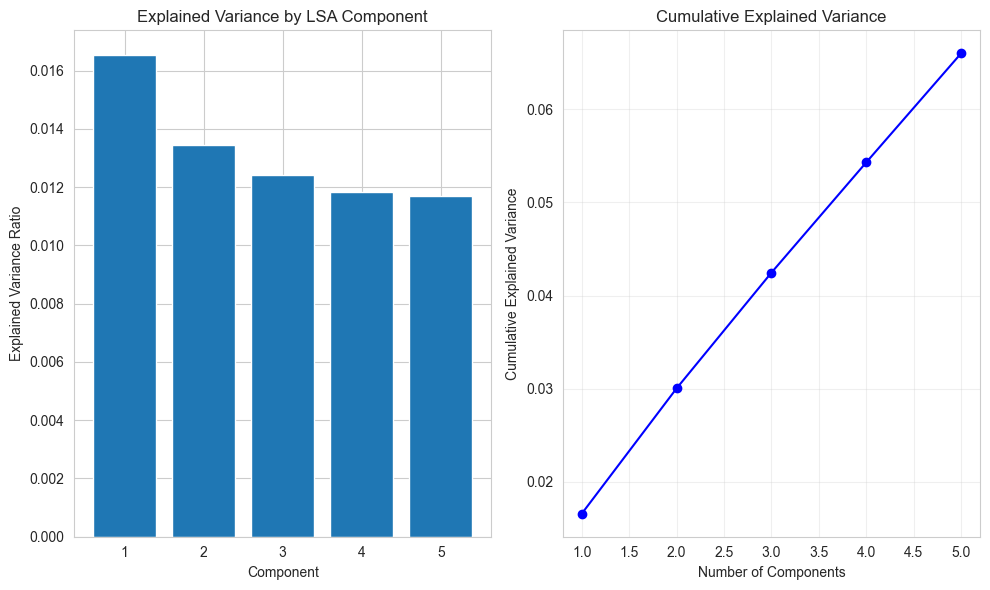

In [100]:
# Plot LSA explained variance
plot_explained_variance(lsa_model)

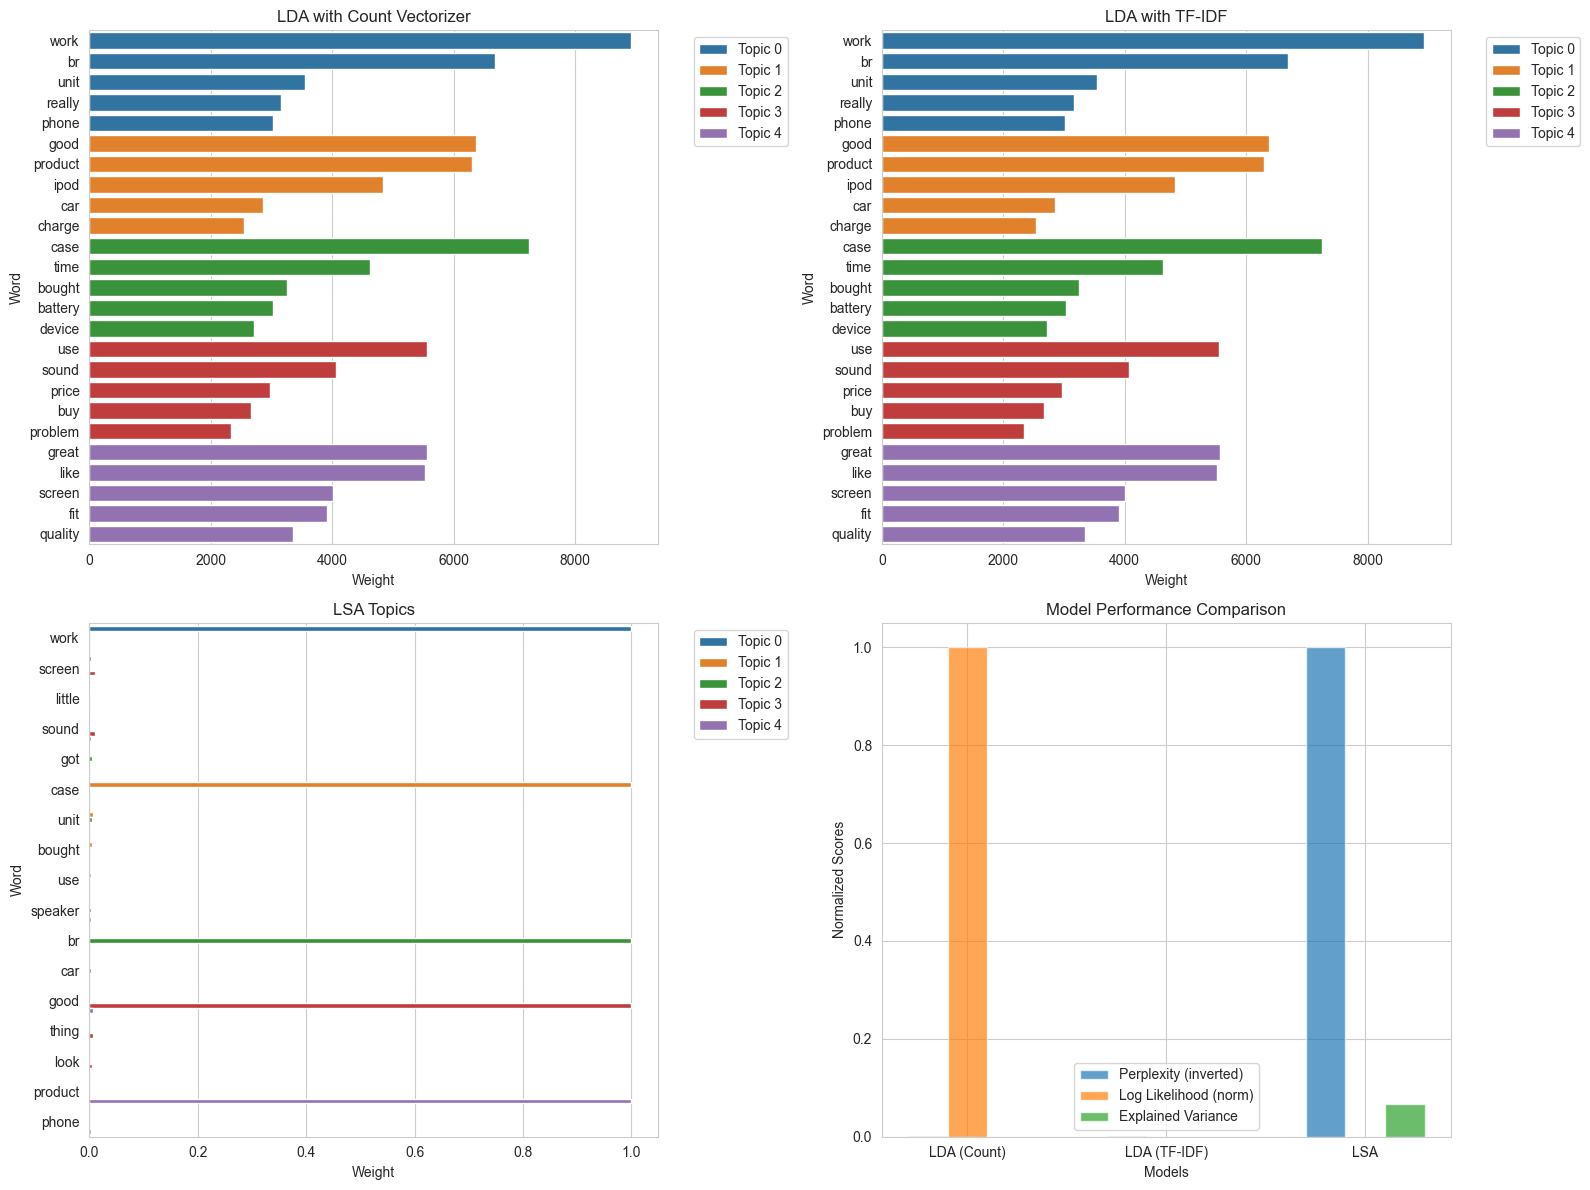

In [101]:
# Compare all topic modeling approaches
plot_topic_comparison()

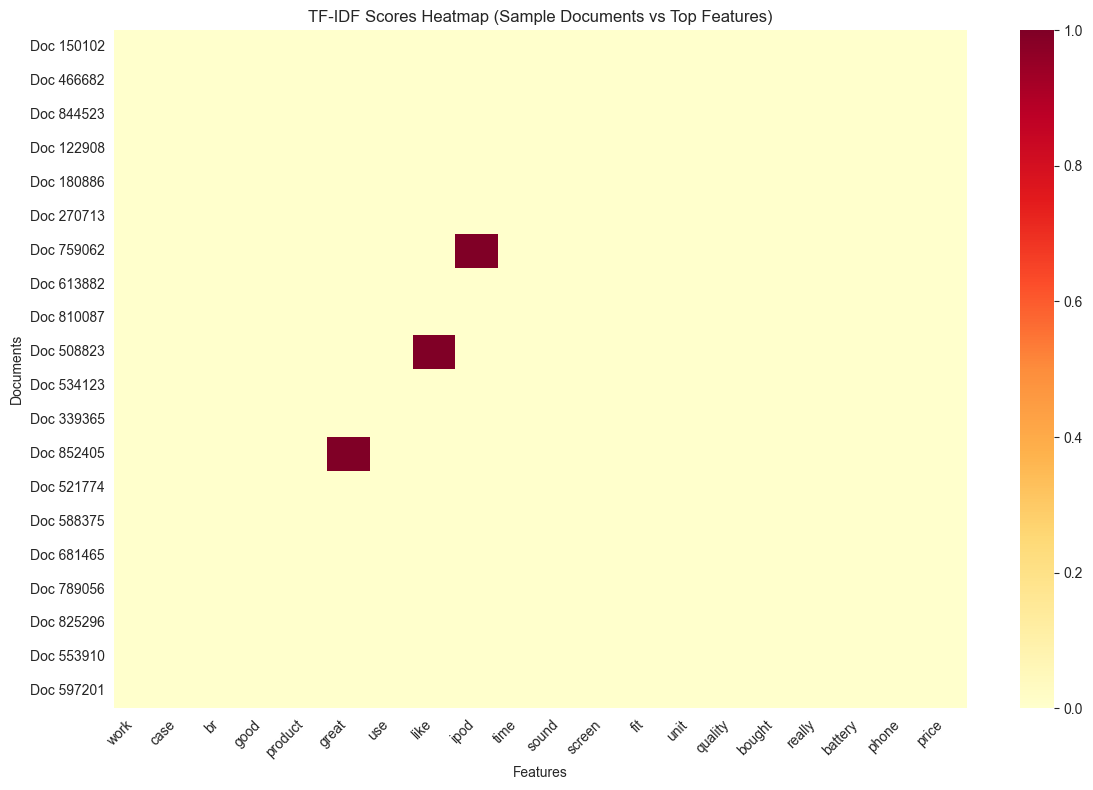

In [102]:
# TF-IDF heatmap
plot_tfidf_heatmap(tfidf_matrix, tfidf_feature_names)